# <center>Product  Recommendation with Prediction Algorithms</center>


<p>&emsp;In this python file I will test prediction algorithms. After testing according to their accuracy scores, I will compare them with each other and thus I will see which prediction algorithm is the best fit for this kind of situation, then I will use that algorithm for  We will use 5 classification algorithms for our test. KNN, Decision Tree, Random Forest, Gaussian NB and Logistic Regression algorithms is going to be used for this prediction program.</p>
<br>  

In [2]:
#Importing some of Libraries

import pandas as pd
import numpy as np

from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Adding csv files 

df1 = pd.read_csv('data.train.csv')
df2 = pd.read_csv('data.test.csv')

#Change category names

df1.rename( columns={'Unnamed: 0':'Customer', 'Products bought by the customer':'ItemId', 'New products bought by the customer':'Product'}, inplace=True )
df2.rename( columns={'Unnamed: 0':'Customer', 'Products bought by the customers':'ItemId', 'New products bought by the customers':'Product'}, inplace=True )

#Creating list from the items in ItemID

def products(item):
    productList = item.split(";")
    return productList

#Apply the function to data

df1["ItemId"] = df1["ItemId"].apply(products)
df2["ItemId"] = df2["ItemId"].apply(products)

#Prepare data for use of prediction algorithms

df1_dummies = df1["ItemId"].str.join(sep='*').str.get_dummies(sep='*') 
df2_dummies = df2["ItemId"].str.join(sep='*').str.get_dummies(sep='*')     

dfTrain = df1.merge(df1_dummies, left_index = True, right_index = True) \
             .drop("ItemId", axis = 1) \
             .drop("Customer", axis = 1)
dfTest = df2.merge(df2_dummies, left_index = True, right_index = True) \
             .drop("ItemId", axis = 1) \
             .drop("Customer", axis = 1)

dfTest.head()

,Product,Acı Sos,Ayçiçek yağı,Baldo pirinç,Beyaz şarap,Bezelye,Biber salçası,Bira,Bisküvi,Böğürtlen,...,Yer fıstığı,Yeşil çay,Yoğurt,Yulaf,Zeytinyağı,Çikolata,Çörek otu,İçli Köfte,Şampuan,Şehriye
0,NaN,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
1,NaN,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,NaN,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,NaN,0,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,1
4,NaN,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


In [4]:
#Encoding

le = preprocessing.LabelEncoder().fit(dfTrain['Product'])
dfTrain['Product'] = le.fit_transform(dfTrain['Product'])

#Creating Train and Test datas and making them 2D arrays

X_train = dfTrain[dfTrain.columns[-74:]].values
X_test = dfTest[dfTest.columns[-74:]].values

y_train = dfTrain.iloc[:, 0].values

y_train.shape

(800,)


<p>&emsp;Now I managed to prepare data for use of prediction algorithms. All prediction algorithms will use these datas(X_train, X_test, y_train). We will start prediction test with KNN algorithm. But if we are using KNN algorithm, we need to define a k value. Because of that I will make accuracy test on dfTrain data and find optimal k value. </p>
<br>  

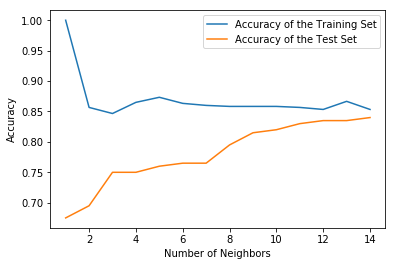

In [12]:
#Accuracy Test 
#Train Test Split for preparing data, %25 for test

X_train_acc, X_test_acc, y_train_acc, y_test_acc = train_test_split(X_train, y_train, test_size=0.25)

training_accuracy = []
test_accuracy = []

# We will test k= 1 to 15
neighbors_settings = range(1,15)


for n_neighbors in neighbors_settings:
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_acc, y_train_acc)
    
    #Record accuracy of training
    training_accuracy.append(clf.score(X_train_acc, y_train_acc))
    
    #Record accuracy of test
    test_accuracy.append(clf.score(X_test_acc, y_test_acc))
    
# Get results on a graph
    
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [13]:
#Prediction with KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


In [14]:
#Prediction with Gaussian Naive Bayes Classifier
#Data can be continuious, because of that better to use Gaussian Naive Bayes Classifier

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred_nb = model.predict(X_test)


In [15]:
#Prediction with Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini') #gini = information gain

model.fit(X_train, y_train)

y_pred_dt= model.predict(X_test)


In [16]:
#Prediction with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()

model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)


In [18]:
#Prediction with Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

y_pred_lr= model.predict(X_test)

#Predictions appears as integer because of the encoding

y_pred_lr

array([3, 3, 0, 3, 2, 2, 2, 2, 0, 3, 2, 0, 2, 3, 1, 3, 3, 2, 1, 0, 3, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 0, 3, 3, 3, 0, 2, 1, 3,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 3, 1, 3, 3, 3, 2, 2, 0, 0, 1, 0, 0, 3, 1, 2, 2, 3, 0, 3, 2, 2,
       1, 0, 1, 1, 0, 0, 3, 2, 0, 2, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 3,
       0, 1, 0, 2, 0, 2, 3, 1, 0, 1, 1, 3, 3, 2, 0, 1, 0, 1, 0, 3, 0, 0,
       1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 0, 3, 0, 0, 2, 0, 2, 3, 0, 0, 1,
       0, 0, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 3, 0, 3, 2, 0, 3, 0, 2,
       0, 2, 3, 3, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 3, 3, 2, 2,
       3, 2], dtype=int64)

<p>&emsp;We have all predictions now. Now I will compare their accuracy rating with a graph and decide which one is giving the best results. </p>
<br>   

KNN: 0.761667 (0.052731)
NB: 0.825000 (0.028137)
DT: 0.715000 (0.056984)
RF: 0.810000 (0.055877)
LR: 0.888333 (0.043493)


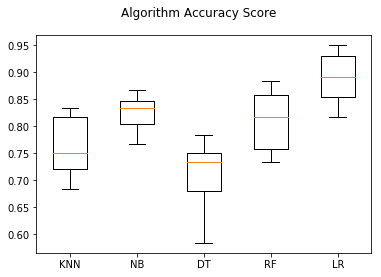

In [20]:
from sklearn import model_selection

#Add a random number generator

seed = 7

#Define models

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier(criterion='gini')))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

# Calculate each model in turn

results = []
algorithms = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_acc, y_train_acc, cv=kfold, scoring=scoring)
    results.append(cv_results)
    algorithms.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
              
# Compare Algorith with boxplot

fig = plt.figure()
fig.suptitle('Algorithm Accuracy Score')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algorithms)
plt.show()

<p>&emsp;According to results from the graph, using Logistic Regression is the best option for my data. I need to invert results back to object type from integer type and add them to df1, in order to see result in data </p>
<br>   

In [25]:
#Adding prediction to test data
#Since Logistic Regression has the best accuracy rating, we are going to use its prediction

import warnings # Version of np library causes Deprecation Warning, filtering it will cause no harm
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

prediction = list(le.inverse_transform(y_pred_lr))

df2['Product'] = prediction

df2.head(20)

,Customer,ItemId,Product
0,Customer_759,"[Kurabiye, Güneş kremi, Patates, Nemlendirici ...",Peeling krem
1,Customer_807,"[Jelibon, Saç kremi, Vücut losyonu, Ayçiçek ya...",Peeling krem
2,Customer_57,"[Nane likörü, Acı Sos, Çikolata, Sarımsak sosu...",Karamelli likör
3,Customer_576,"[Nar ekşisi, Sirke, Yoğurt, İçli Köfte, Nohut,...",Peeling krem
4,Customer_80,"[Şehriye, Sarımsak sosu, El mantısı, Ton balığ...",Kurutulmuş Kivi
5,Customer_398,"[Un, Garnitür, Sirke, Biber salçası, Pizza, Ku...",Kurutulmuş Kivi
6,Customer_525,"[Kurabiye, Tarçın, Kuru İncir, Un, Kalamar, El...",Kurutulmuş Kivi
7,Customer_999,"[Papatya çayı, Kuru kayısı, Sarımsak sosu, Yoğ...",Kurutulmuş Kivi
8,Customer_858,"[Nar ekşisi, Papatya çayı, Kurabiye, Baldo pir...",Karamelli likör
9,Customer_227,"[Ayçiçek yağı, Un, Karides, Patates, Jelibon, ...",Peeling krem
